In [156]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
import math
from typing import List  #for the function annotation
from Classes_and_Functions.classes import Pattern, Index   
from Classes_and_Functions.functions import  get_overlapping_tiles, valid_dirs,initialize_wave_function, get_all_rotations2
from Classes_and_Functions.functions import is_fully_collapsed, get_possible_patterns_at_position, post_collasping
from Classes_and_Functions.funcs_colour import Is_element_in_dict, find_key, read_pattern_array,find_enclosed_positions

# Load sample and extract patterns

In [157]:
# For more complicated patterns use plt.imread()
# In the case of coloured image 

pixels = plt.imread('./assets/Flowers.png')[:,:,:3]   #RGB inputs

input_size = tuple(pixels.shape[x] for x in range(2) )
output_size = (15,15)           #fixed output
N = 2 # size of the patterns that will be considered in the Wavefunction Collapse Algorithm

(24, 15, 3)
[[[0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  ...
  [0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]]

 [[0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  ...
  [0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]]

 [[0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  ...
  [0.7490196  0.9098039  0.9490196 ]
  [1.         0.9490196  0.        ]
  [0.7490196  0.9098039  0.9490196 ]]

 ...

 [[0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  ...
  [0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]
  [0.7490196  0.9098039  0.9490196 ]]

 [[0.7254902  0.47843137 0.34117648]
  [0.7254902  0.47843137 

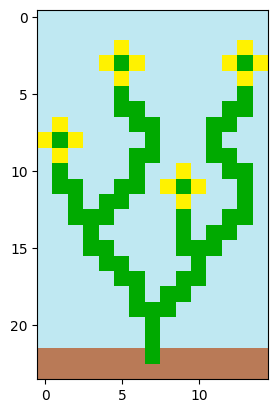

In [158]:
plt.imshow(pixels) # create plt
print(pixels.shape)
print(pixels)
plt.show()

Since the input is in RBG where the pixels.shape() = (m,n,3), needed to map the unique colours for each tile (list of length 4) to hashable objects (in this case integers) so that the code in the following parts still work. Recall that previously we only dealt with Blak & White images which have pixels.shape() of (m,n,1).

Function Is_element_in_dict() from funcs_colour.py was used.


In [159]:
colour = {} #create colour dictionary to map between a unique finite number to a unique list/int of colour pixel
key = 0 # the key of the colour dictionary originally zero and will increase by 1 for each additional unique pattern



for i in range(input_size[0]): # row 
    for j in pixels[i]: # column
        if Is_element_in_dict(colour,j):  # j is a pixel element for each tile
            continue    #avoid the repetitive mapping
        colour[key] = j
        key +=1
         
print(colour)
print(key)    
#The number of keys agree with the number that can be counted from eyes which is 4


{0: array([0.7490196, 0.9098039, 0.9490196], dtype=float32), 1: array([1.       , 0.9490196, 0.       ], dtype=float32), 2: array([0.       , 0.6666667, 0.       ], dtype=float32), 3: array([0.7254902 , 0.47843137, 0.34117648], dtype=float32)}
4


However ,for this flower image, the colour greeen inside the flower should be distinguishable from the one using for its stem. So another key (integer 4) will be added to distinguish the green inside the flowers.

In [160]:
colour[4] = colour[2]
print(colour)
#The key 4 is meant to be the green inside the flowers 

{0: array([0.7490196, 0.9098039, 0.9490196], dtype=float32), 1: array([1.       , 0.9490196, 0.       ], dtype=float32), 2: array([0.       , 0.6666667, 0.       ], dtype=float32), 3: array([0.7254902 , 0.47843137, 0.34117648], dtype=float32), 4: array([0.       , 0.6666667, 0.       ], dtype=float32)}


Function find_key() from funcs_colour.py was used.

In [161]:
# Now map the pixel elements in pixels to the key

pixels_copy = np.zeros(input_size)

   

for y in range(input_size[0]): # row 
    for x in range(input_size[1]): # column
        #replace all the pixels (list of length 3) with the corresponding keys from the colour dictionary 
        pixels_copy[y][x] = find_key(colour,pixels[y][x]) 


print(pixels_copy)   #works as intended  
#each unique integer is a key of a unique colour in the colour dictionary
  

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 1. 2. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2. 2. 0.]
 [0. 1. 0. 0. 0. 0. 2. 2. 0. 0. 0. 2. 2. 0. 0.]
 [1. 2. 1. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 2. 2. 0. 0. 0. 2. 2. 0. 0.]
 [0. 2. 0. 0. 0. 0. 2. 0. 0. 1. 0. 0. 2. 2. 0.]
 [0. 2. 2. 0. 0. 2. 2. 0. 1. 2. 1. 0. 0. 2. 0.]
 [0. 0. 2. 0. 2. 2. 0. 0. 0. 1. 0. 0. 0. 2. 0.]
 [0. 0. 2. 2. 2. 0. 0. 0. 0. 2. 0. 0. 2. 2. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 0. 0.]
 [0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 2. 0. 0. 2. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.

In [162]:
#Replacing integer 2 with 4 for those at the positions_enclosed

positions_enclosed = find_enclosed_positions(input_size,pixels_copy)
#print(positions_enclosed)

for a in positions_enclosed:
    pixels_copy[a[0],a[1]] = 4
    
print(pixels_copy)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 4. 1. 0. 0. 0. 0. 0. 1. 4. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2. 2. 0.]
 [0. 1. 0. 0. 0. 0. 2. 2. 0. 0. 0. 2. 2. 0. 0.]
 [1. 4. 1. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 2. 2. 0. 0. 0. 2. 2. 0. 0.]
 [0. 2. 0. 0. 0. 0. 2. 0. 0. 1. 0. 0. 2. 2. 0.]
 [0. 2. 2. 0. 0. 2. 2. 0. 1. 4. 1. 0. 0. 2. 0.]
 [0. 0. 2. 0. 2. 2. 0. 0. 0. 1. 0. 0. 0. 2. 0.]
 [0. 0. 2. 2. 2. 0. 0. 0. 0. 2. 0. 0. 2. 2. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 0. 0.]
 [0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 2. 0. 0. 2. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.

 Reading all possible patterns of size NxN from the input image and record their rotated patterns as the results will be shown below.  

Since the flower.png do not give reasonable result with rotations included, the get_all_rotations() function will not be used.

In [163]:
patterns = []
weights = {} # dict pattern -> count occurence which will be used to calculate the probabilities
probability = {} # dict pattern -> probability


for y in range(input_size[0]-(N-1)): # row 
    for x in range(input_size[1]-(N-1)): # column
        pattern = []
        for k in pixels_copy[y:y+N]:
            pattern.append([i for i in k[x:x+N]])         
        pattern_rotations = get_all_rotations2(pattern)        # no longer include the patterns rotations
        
        for rotation in pattern_rotations:
            if rotation not in weights:         #keys of dictionary can only be either string or int
                weights[rotation] = 1
            else:
                weights[rotation] += 1   # weights = count of occurences of the same pattern after rotations
        
        patterns.extend(pattern_rotations)
        
# remove duplicates
patterns_without_duplicates = []
for patt in patterns:
    if patt not in patterns_without_duplicates:
        patterns_without_duplicates.append(patt)
patterns = patterns_without_duplicates

sum_of_weights = 0
for weight in weights:
    sum_of_weights += weights[weight]

for pattern in patterns:
    probability[pattern] = weights[pattern] / sum_of_weights  #probability of each subpattern over total patterns after rotation
    
# convert patterns from tuples into Pattern objects
patterns = [Pattern(p) for p in patterns]               #from this point onwards the Class Pattern.pixel = pixel key
weights = {pattern:weights[pattern.pixels] for pattern in patterns}
probability = {pattern:probability[pattern.pixels] for pattern in patterns}


Since the patterns obtained from the input and key assignment come in arrays of NxN, we need a function to transform the encrypted array of patterns into the format which is readable by plt.imshow()

Function read_pattern_array() from funcs_colour.py was used.

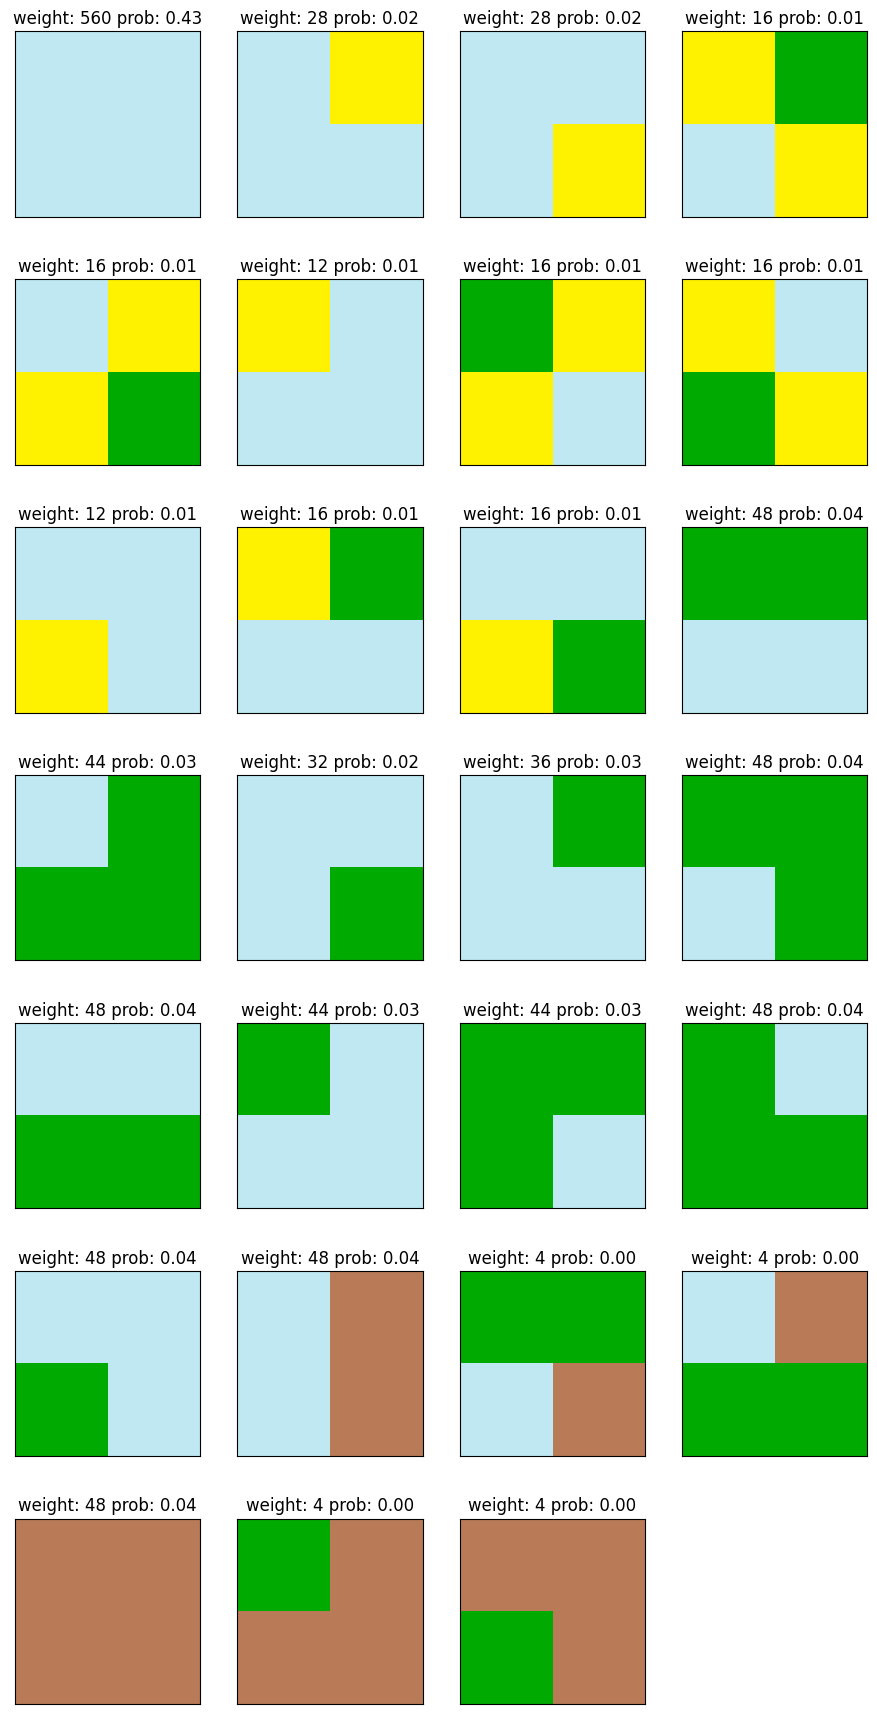

In [164]:
# show 
plt.figure(figsize=(11,22))
for m in range(len(patterns)):
    axs = plt.subplot( math.ceil(len(patterns)/4) , 4 , m+1)
    axs.imshow(read_pattern_array(N,colour,patterns[m]))  
    axs.set_xticks([])
    axs.set_yticks([])
    plt.title("weight: %.0f prob: %.2f"%(weights[patterns[m]], probability[patterns[m]]))
plt.show()

## Create Index data structure describing rules for placing patterns

In [165]:
UP = (0, -1)   # index of the pixel above relative to the pixel of interest
LEFT = (-1, 0)
DOWN = (0, 1)
RIGHT = (1, 0)
UP_LEFT = (-1, -1)
UP_RIGHT = (1, -1)
DOWN_LEFT = (-1, 1)
DOWN_RIGHT = (1, 1)
dirs = [UP, DOWN, LEFT, RIGHT, UP_LEFT, UP_RIGHT, DOWN_LEFT, DOWN_RIGHT]


In [166]:
#Initialise the index class for determining the allowed adjacent patterns 
index = Index(patterns)

In [167]:
# Generate rules for Index and save them
# Function get_overlapping_tiles() from the functions file was used. 

rules_num = 0
for pattern in patterns:
    for d in dirs:
        for pattern_next in patterns:
            # here's checking all offsets 
            overlap = get_overlapping_tiles(pattern_next, d)
            og_dir = tuple([d[0]*-1, d[1]*-1])   #original direction is the opposite 
            part_of_og_pattern = get_overlapping_tiles(pattern, og_dir)
            if (overlap) == (part_of_og_pattern):
                index.add_rule(pattern, d, pattern_next)
                rules_num+=1

In [168]:
# Show data in Index for sanity check 
print(f"There are {rules_num} rules")
"""
for d in index.data:
    print(f'Pattern {d.pixels}')
    for pos in index.data[d]:
        print(f' Pos {pos}')
        for pattern in index.data[d][pos]:
            print(f' {pattern.pixels}')
"""
#put it in as comments for simplicity in editing (the result is very long)
#The code works as intended so far

There are 1218 rules


"\nfor d in index.data:\n    print(f'Pattern {d.pixels}')\n    for pos in index.data[d]:\n        print(f' Pos {pos}')\n        for pattern in index.data[d][pos]:\n            print(f' {pattern.pixels}')\n"

## Define coefficients

At the beginning, all available patterns are possible at all positions and what algorithm has to do is to reduce their number to only one pattern at each possition.

We start by defining matrix of tiles with corresponding possible patterns later called matrix of coefficients. In original implementation this holds boolean values denoting which pattern is still available. For simplicity we will use patterns themself to tell which are still possible in this position.

Gumin’s algorithm does not implement local backtracking and
instead globally restarts in the rare case a conflict is reached.

In [169]:
#initilize_wave_function

coefficients = initialize_wave_function(output_size,patterns)  # will be updated to one pattern for each tile if the algorithn is fully complete 

# Algorithm itself

## Definition of Shannon entropy 

For this notebook, we are using the minimum remaining values heuristic. Therefore, the shannon entropy is introduced here. The bigger number of possible patterns for a tile, the bigger the "uncertainty" ,ie the entropy, is. Tile where only one pattern is possible has entropy equal to 0.

For each iteration we need to start propagating our algorithm from the place with the lowest non zero entropy meaning level of “uncertainty” is the smallest.

$$ \huge H(X) = - \sum^{n}_{i=1} p_i \log_2 p_i $$

In [170]:
def get_shannon_entropy(position):
    """
    Calcualte the Shannon Entropy of the wavefunction at position (x, y)
    Retunr None for the case that the tile has no possible patterns 

    """
    x, y = position
    entropy = 0
    
    # A cell with one valid pattern has 0 entropy
    if len(coefficients[x][y]) == 1:
        return 0
    
    elif len(coefficients[x][y]) == 0:  #want to throw an error for this
        return None
    
    for pattern in coefficients[x][y]:
          #recall that probability is a dictionary of probabilities where the key is the corresponding pattern
        entropy -= probability[pattern] * math.log(probability[pattern], 2) 
    
    # Add noise to break ties and near-ties
    entropy -= random.uniform(0, 0.1)
    return entropy


In [171]:
def get_min_entropy_pos():
    """
    Return position of tile with the lowest non-zero entropy for non fullly collapsed wavefunctions
    Return None for fully collapsed wavefunction
    Return 0 for contradiction
    
    """
    minEntropy = None  #since zero is meaningful had to resort to None
    minEntropyPos = None
    
    for x, col in enumerate(coefficients):    #x, y positions don't make sense but could be my brain is being daft
        for y, row in enumerate(col):
            entropy = get_shannon_entropy((x, y))
            
            if entropy == 0:
                continue   # to skip the tiles with zero entropy

            elif entropy == None:
                return 0   #resort to zero as None is taken and zero is not going to be used anyway
            
            if minEntropy is None or entropy < minEntropy:
                minEntropy = entropy
                minEntropyPos = (x, y)
    return minEntropyPos
  

## Implement the minimum remaining value (MRV) heuristic 

Since there usually is more than one valid pattern for the selected location, one of the patterns is chosen with a random sample, weighted by the frequency that pattern appears in the input image. This implements Gumin’s secondary goal for local similarity: that patterns
appear with a similar distribution in the output as are found in the input.

In [172]:
def observe():
    '''
    This function will be used to observe the position with minimum entropy
    ,and collapse the wavefunction at the position to one state based on the pattern with maximum probability.
    Tie will be chosen randomly by the random.choice() function. 
    It returns the position of the pixel with minimum entropy // convenient for passing the function as the argument of the Propagator() function
    Unless the wavefunction is fully collapsed-> print("All tiles have 0 entropy")  
    or contradiction was observed --> print("Contradiction was detetced. Rerun again sorry")  
    '''
    
    min_entropy_pos = get_min_entropy_pos()  # Find the position of the tile with lowest entropy
    
    if min_entropy_pos == None:             # min_entropy_pos == None satisfied when the wavefunction is fully collapsed.
        print("All tiles have 0 entropy")
        return
    
    elif min_entropy_pos == 0:           # min_entropy_pos == 0 satisfied when a tile has no possible pattern (contradiction)
        print("Contradiction was detetced. Rerun again sorry")                                                   
        return min_entropy_pos
    
    # Choose a pattern at lowest entropy position which is most frequent in the sample
    possible_patterns = get_possible_patterns_at_position(min_entropy_pos,coefficients)
    
    # calculate max probability for patterns that are left
    max_p = 0
    for pattern in possible_patterns:
        if max_p < probability[pattern]:
            max_p == probability[pattern]
    
    
    semi_random_pattern = random.choice([pat for pat in possible_patterns if probability[pat]>=max_p])
    
    # Set this pattern to be the only available at this position
    coefficients[min_entropy_pos[0]][min_entropy_pos[1]] = semi_random_pattern
    
    return min_entropy_pos


After a pattern has been assigned to a tile, we need to check if all of patterns in adjacent tiles are still possible in their locations. So it’s time to propagate. For every change we do in our matrix, we add tile position into a stack. For every adjacent tile, if there is a change, we add it’s position. If there is no change in neigbourhood tiles, we take tiles from stack, check for changes and add changed tiles positions into a stack and so on…

In [173]:
def propagate(min_entropy_pos):

    '''
    Update the coefficients of the neighbours
    '''
    stack = [min_entropy_pos]
    
    
    while len(stack) > 0:
        
        pos = stack.pop()  #list.pop() removes the element at the specified position... default is -1
        
        #pos equals to the last element in the stack list and stack has one less member
        possible_patterns = get_possible_patterns_at_position(pos,coefficients)
        

        # Iterate through each location immediately adjacent to the current location
        for d in valid_dirs(pos,output_size):
            adjacent_pos = (pos[0] + d[0], pos[1] + d[1])
            possible_patterns_at_adjacent = get_possible_patterns_at_position(adjacent_pos,coefficients)
            
            # Iterate over all still available patterns in adjacent tile 
            # and check if pattern is still possible in this location
            if not isinstance(possible_patterns_at_adjacent, list):
                possible_patterns_at_adjacent = [possible_patterns_at_adjacent]
            for possible_pattern_at_adjacent in possible_patterns_at_adjacent:
                if len(possible_patterns) > 1:
                    #any(iterable) function returns True if any item in the iterable are true otherwise False
                    is_possible = any([index.check_possibility(pattern, possible_pattern_at_adjacent, d) for pattern in possible_patterns])
                else:
                    is_possible = index.check_possibility(possible_patterns, possible_pattern_at_adjacent, d)
                    
                '''
                If the tile is not compatible with any of the tiles in the current location's wavefunction
                then it's impossible for it to ever get choosen so it needs to be removed from the other
                location's wavefunction
                '''
                if not is_possible:
                    x, y = adjacent_pos
                    coefficients[x][y] = [patt for patt in coefficients[x][y] if patt.pixels != possible_pattern_at_adjacent.pixels]
                        
                    if adjacent_pos not in stack:
                        stack.append(adjacent_pos)

Fully collapse it completely as animation takes a while to run so not making it for this one

In [174]:
while not is_fully_collapsed(coefficients):
    min_entropy_pos = observe()
    if min_entropy_pos == 0 :  #correspond to when contradiction was detected 
        break
    propagate(min_entropy_pos)

## Post process

Write another function to read_output_array(N,colour,final_pixels)

In [175]:
def read_output_array(M,colour,final_pixels):
    """
    This function receives the patten size(NxN), the colour dictionary and the final_pixels
    Return readable_output_array for plt.imshow()
    """
    readable_output_array = np.zeros((M,M,3))  #initialise the desired array as shape (N,N.3)

    for m in range(M):
        for n in range(M):
            key_mn = final_pixels[m][n]
            for o in range(3):
                readable_output_array[m][n][o] = colour[key_mn][o]
            
    return readable_output_array 

After our algorithm finishes we can now extract distinct pixels from patterns. Each pattern has equal intersection with all of it’s adjacent patterns. If we get only first pixel from each pattern, we get unique part of each.

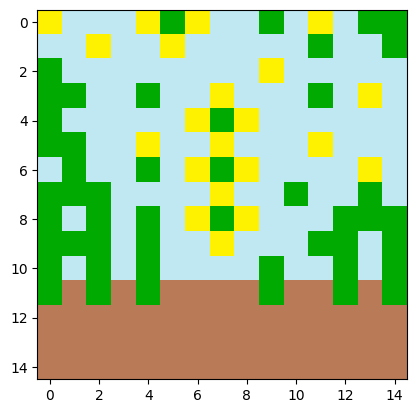

In [176]:
final_pixels = post_collasping(coefficients)
M = output_size[0]    
plt.imshow(read_output_array(M,colour,final_pixels))
plt.show()

For the case that wavefunctions collapse according to the probability distribution.

In [177]:
#initilize_wave_function

coefficients = initialize_wave_function(output_size,patterns)  # will be updated to one pattern for each tile if the algorithn is fully complete 

In [178]:
def observe2():
    """
   This function will be used to observe the position with minimum entropy
    ,and collapse the wavefunction at the position to one state based on the frequency of pattern from the input image.
    Tie will be chosen randomly by the random.choice() function. 
    It returns the position of the pixel with minimum entropy // convenient for passing the function as the argument of the Propagator() function
    Unless the wavefunction is fully collapsed-> print("All tiles have 0 entropy")  
    or contradiction was observed --> print("Contradiction was detetced. Rerun again sorry") 
    """
   
    min_entropy_pos = get_min_entropy_pos()  # Find the position of the tile with lowest entropy
    
    if min_entropy_pos == None:             # min_entropy_pos == None satisfied when the wavefunction is fully collapsed.
        print("All tiles have 0 entropy")
        return
    
    elif min_entropy_pos == 0:           # min_entropy_pos == 0 satisfied when a tile has no possible pattern (contradiction)
        print("Contradiction was detetced. Rerun again sorry")                                                   
        return min_entropy_pos
    
    
    # Initialise possible patterns list at lowest entropy position 
    possible_patterns = get_possible_patterns_at_position(min_entropy_pos,coefficients)
    
    # Collapse the wavefunction according to the probability distribution using np.random.choice(a : 1D array, p= :List)

    prob_distribution_list = [probability[pattern] for pattern in possible_patterns]   # p argument
    normalised_prob_dis = prob_distribution_list / np.sum(prob_distribution_list)   #Normailse the prob_dis so total prob = 1 
    collapsing_index = np.random.choice(np.arange(len(possible_patterns)), p=normalised_prob_dis)
    
    # Set this pattern to be the only available at this position
    coefficients[min_entropy_pos[0]][min_entropy_pos[1]] = possible_patterns[collapsing_index]
    
    return min_entropy_pos

In [179]:
def propagate2(min_entropy_pos):

    """
    Update the coefficients of the neighbours
    """
    
    stack = [min_entropy_pos]
    
    
    while len(stack) > 0:
        
        pos = stack.pop()  #list.pop() removes the element at the specified position... default is -1
        
        #pos equals to the last element in the stack list and stack has one less member
        possible_patterns = get_possible_patterns_at_position(pos,coefficients)
        
        # Iterate through each location immediately adjacent to the current location
        for d in valid_dirs(pos,output_size):
            adjacent_pos = (pos[0] + d[0], pos[1] + d[1])
            possible_patterns_at_adjacent = get_possible_patterns_at_position(adjacent_pos,coefficients)
            
            # Iterate over all still available patterns in adjacent tile 
            # and check if pattern is still possible in this location
            if not isinstance(possible_patterns_at_adjacent, list):
                possible_patterns_at_adjacent = [possible_patterns_at_adjacent]
            for possible_pattern_at_adjacent in possible_patterns_at_adjacent:
                if len(possible_patterns) > 1:
                    #any(iterable) function returns True if any item in the iterable are true otherwise False
                    is_possible = any([index.check_possibility(pattern, possible_pattern_at_adjacent, d) for pattern in possible_patterns])
                else:
                    is_possible = index.check_possibility(possible_patterns, possible_pattern_at_adjacent, d)
                    
                """
                If the tile is not compatible with any of the tiles in the current location's wavefunction
                then it's impossible for it to ever get choosen so it needs to be removed from the other
                location's wavefunction
                """
                if not is_possible:
                    x, y = adjacent_pos
                    coefficients[x][y] = [patt for patt in coefficients[x][y] if patt.pixels != possible_pattern_at_adjacent.pixels]
                        
                    if adjacent_pos not in stack:
                        stack.append(adjacent_pos)

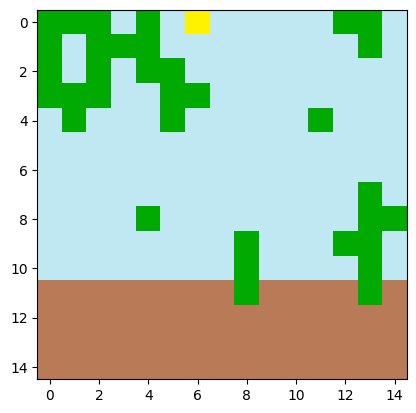

In [180]:
while not is_fully_collapsed(coefficients):
    min_entropy_pos = observe2()
    if min_entropy_pos == 0 :  #correspond to when contradiction was detected 
        break
    propagate2(min_entropy_pos)



final_pixels = post_collasping(coefficients)
    
plt.imshow(read_output_array(M,colour,final_pixels))
plt.show()

#comment perhaps get rid off the rotational symmetries? 